# 🧠 Introducción a Redes Neuronales Artificiales (ANNs)

Este cuaderno te guiará paso a paso en la implementación de una red neuronal simple desde cero usando `NumPy`, para entender cómo funciona internamente una red.

Aprenderás:
- Cómo se construye una neurona artificial
- Qué es forward y backward propagation
- Cómo entrenar una red con descenso del gradiente
- Cómo aplicar estos conocimientos a un problema XOR

In [1]:
# 🔧 Importamos librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

## 📊 Datos de entrada (XOR)
Usaremos el problema clásico de XOR como conjunto de datos. Tiene 2 entradas y 1 salida binaria.

In [3]:
# Entradas y salidas esperadas
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

## ⚙️ Funciones de activación
Usamos la sigmoide para la activación y su derivada para backpropagation.

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

## 🧠 Inicialización de pesos
Inicializamos los pesos de forma aleatoria para las dos capas (entrada → oculta, oculta → salida).

In [5]:
np.random.seed(42)
w0 = 2 * np.random.random((2, 4)) - 1
w1 = 2 * np.random.random((4, 1)) - 1

## 🔁 Entrenamiento
Ejecutamos el ciclo de entrenamiento con propagación hacia adelante y retropropagación para ajustar los pesos.

In [6]:
errors = []
for epoch in range(10000):
    # Forward
    l0 = X
    l1 = sigmoid(np.dot(l0, w0))
    l2 = sigmoid(np.dot(l1, w1))

    # Error
    error = y - l2
    errors.append(np.mean(np.abs(error)))

    # Backpropagation
    l2_delta = error * sigmoid_derivative(l2)
    l1_delta = l2_delta.dot(w1.T) * sigmoid_derivative(l1)

    # Actualización de pesos
    w1 += l1.T.dot(l2_delta)
    w0 += l0.T.dot(l1_delta)

## 📈 Visualización del error durante el entrenamiento

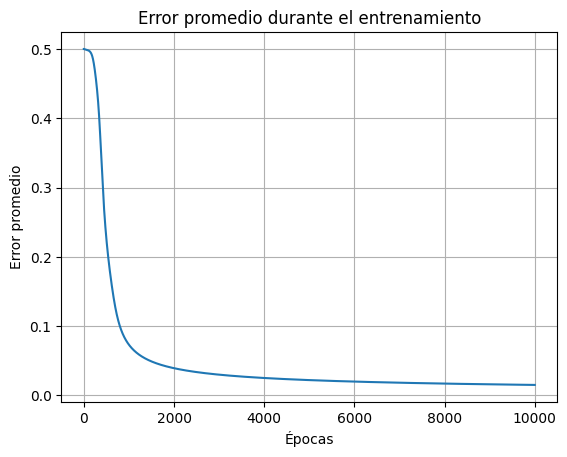

In [7]:
plt.plot(errors)
plt.title('Error promedio durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error promedio')
plt.grid(True)
plt.show()

## ✅ Predicciones finales
Veamos cómo predice la red después del entrenamiento.

In [8]:
print("Predicciones después del entrenamiento:")
print(l2.round(2))

Predicciones después del entrenamiento:
[[0.02]
 [0.99]
 [0.98]
 [0.01]]


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
# XORX
X = np.array([[0,0],[0,1],[1,0], [1,1]])
y = np.array([[0],[1],[1],[0]])
# Modelo
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu')) # capa oculta
model.add(Dense(1, activation='sigmoid')) # capa salida
# Compilar y entrenar
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=1000, verbose=0)
# Predicciones
print("Predicciones:")
print(model.predict(X))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Predicciones:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[0.21470223]
 [0.7319116 ]
 [0.890839  ]
 [0.26255968]]
